In [1]:
from google.colab import files

# Akan muncul tombol "Choose Files"
uploaded = files.upload()


Saving seeds_dataset.txt to seeds_dataset.txt


In [2]:
# Import library untuk deep learning
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Pengaturan visualisasi
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Informasi Dataset MNIST:
Jumlah data training: 60000
Jumlah data testing: 10000
Ukuran gambar: 28x28
Jumlah kelas: 10


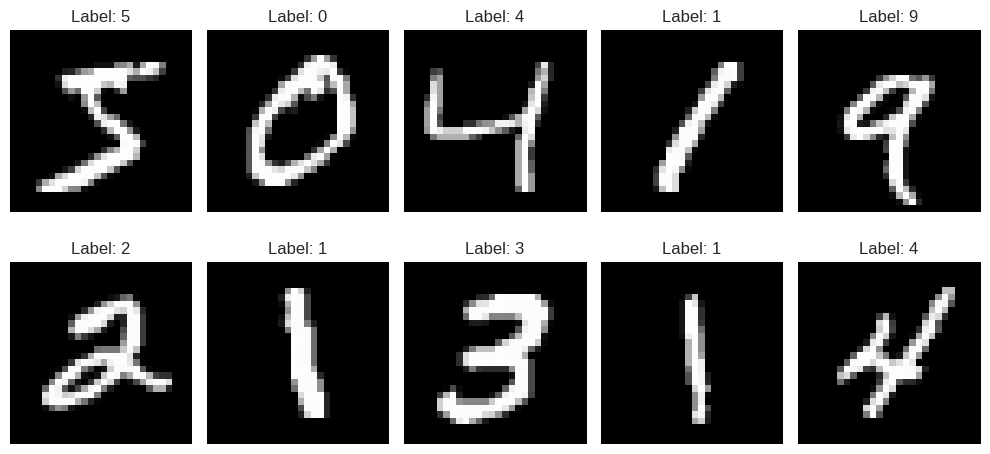


Setelah Preprocessing:
Data training: (50000, 28, 28, 1)
Data validation: (10000, 28, 28, 1)
Data testing: (10000, 28, 28, 1)


In [3]:
# Load dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Tampilkan informasi dataset
print("Informasi Dataset MNIST:")
print(f"Jumlah data training: {train_images.shape[0]}")
print(f"Jumlah data testing: {test_images.shape[0]}")
print(f"Ukuran gambar: {train_images.shape[1]}x{train_images.shape[2]}")
print(f"Jumlah kelas: {len(np.unique(train_labels))}")

# Tampilkan beberapa contoh gambar
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Preprocessing data
# Normalisasi pixel values ke rentang 0-1
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding untuk label
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Split validation set dari training set
val_images = train_images[:10000]
val_labels = train_labels[:10000]
partial_train_images = train_images[10000:]
partial_train_labels = train_labels[10000:]

print("\nSetelah Preprocessing:")
print(f"Data training: {partial_train_images.shape}")
print(f"Data validation: {val_images.shape}")
print(f"Data testing: {test_images.shape}")

In [4]:
# Buat model sequential
model = models.Sequential([
    # Layer konvolusi pertama
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Layer konvolusi kedua
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten layer untuk menghubungkan ke dense layer
    layers.Flatten(),

    # Dense layer dengan dropout untuk mengurangi overfitting
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    # Output layer dengan 10 neuron (sesuai jumlah kelas)
    layers.Dense(10, activation='softmax')
])

# Tampilkan arsitektur model
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training model
history = model.fit(
    partial_train_images,
    partial_train_labels,
    epochs=15,
    batch_size=64,
    validation_data=(val_images, val_labels)
)

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.8302 - loss: 0.5368 - val_accuracy: 0.9803 - val_loss: 0.0687
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.9713 - loss: 0.0932 - val_accuracy: 0.9843 - val_loss: 0.0543
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9796 - loss: 0.0655 - val_accuracy: 0.9848 - val_loss: 0.0523
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.9842 - loss: 0.0527 - val_accuracy: 0.9883 - val_loss: 0.0457
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 49ms/step - accuracy: 0.9862 - loss: 0.0454 - val_accuracy: 0.9891 - val_loss: 0.0396
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9875 - loss: 0.0383 - val_accuracy: 0.9893 - val_loss: 0.0399
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.9896 - loss: 0.0327 - val_accuracy: 0.9893 - val_loss: 0.0424
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9908 - loss: 0.0289 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9906 - loss: 0.0345

Akurasi pada test set: 0.9926
Loss pada test set: 0.0285


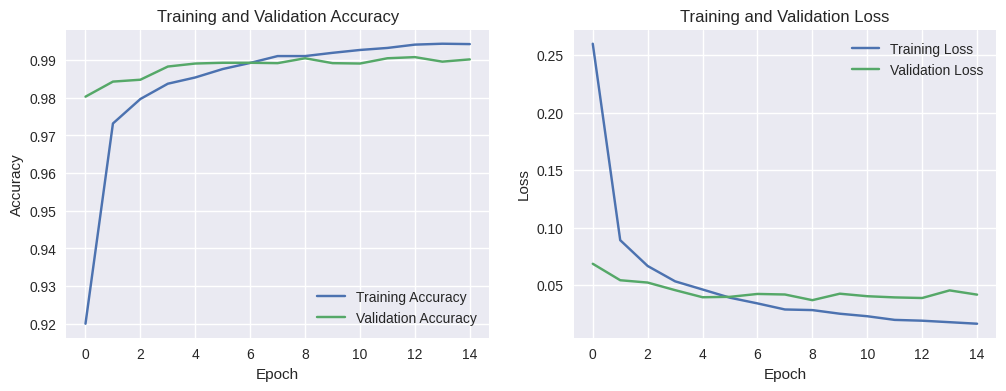

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


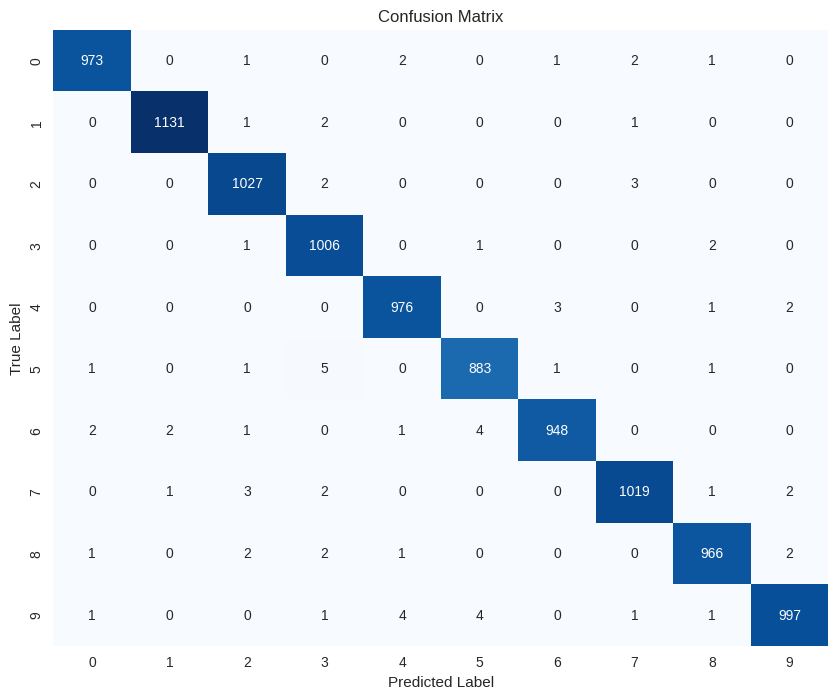


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [6]:
# Evaluasi model pada test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nAkurasi pada test set: {test_acc:.4f}")
print(f"Loss pada test set: {test_loss:.4f}")

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Prediksi pada test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

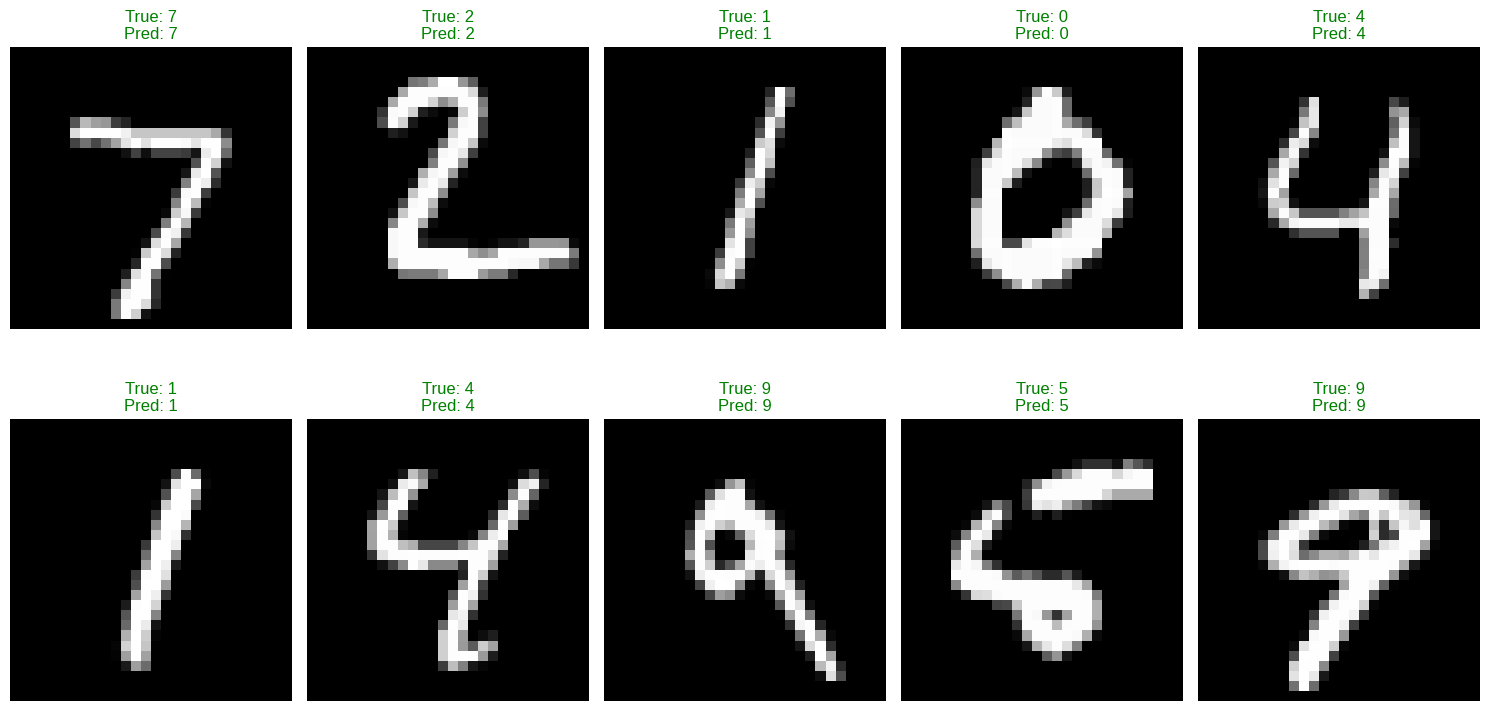

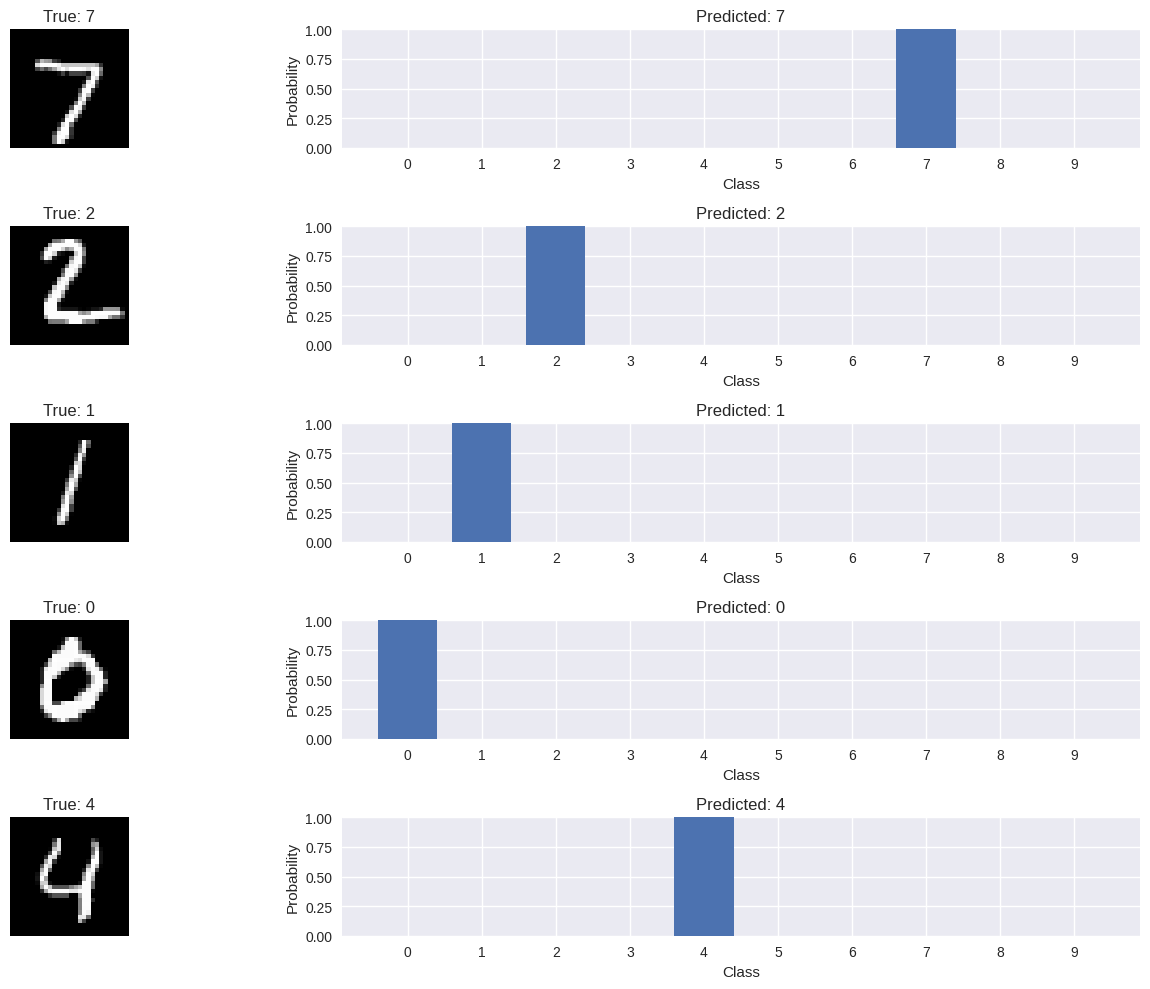

In [7]:
# Tampilkan beberapa contoh prediksi
def plot_predictions(images, true_labels, predicted_labels, num_samples=10):
    plt.figure(figsize=(15, 8))
    for i in range(num_samples):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        color = 'green' if true_labels[i] == predicted_labels[i] else 'red'
        plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Tampilkan prediksi untuk 10 sampel pertama
plot_predictions(test_images, true_labels, predicted_labels)

# Visualisasi distribusi probabilitas untuk beberapa sampel
def plot_probability_distributions(images, true_labels, predictions, num_samples=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        plt.subplot(num_samples, 2, 2*i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {true_labels[i]}")
        plt.axis('off')

        plt.subplot(num_samples, 2, 2*i+2)
        plt.bar(range(10), predictions[i])
        plt.title(f"Predicted: {np.argmax(predictions[i])}")
        plt.xlabel('Class')
        plt.ylabel('Probability')
        plt.xticks(range(10))
        plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

# Tampilkan distribusi probabilitas untuk 5 sampel
plot_probability_distributions(test_images[:5], true_labels[:5], predictions[:5])

In [8]:
# Simpan model
model.save('mnist_model.h5')
print("Model telah disimpan sebagai 'mnist_model.h5'")

# Download model
from google.colab import files
files.download('mnist_model.h5')

Model telah disimpan sebagai 'mnist_model.h5'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
from IPython.display import Markdown, display

# Teks markdown dalam bentuk string
markdown_text = """
## Kesimpulan Posttest 5 - Model Deep Learning untuk MNIST

### Dataset
- **Dataset**: MNIST (Modified National Institute of Standards and Technology)
- **Deskripsi**: Dataset berisi 70.000 gambar grayscale digit tulisan tangan (0-9)
- **Ukuran Gambar**: 28x28 pixel
- **Split Data**:
  - Training: 50.000 gambar
  - Validation: 10.000 gambar
  - Testing: 10.000 gambar

### Preprocessing Data
1. **Reshape**: Mengubah dimensi gambar dari (28, 28) menjadi (28, 28, 1) untuk menambah channel
2. **Normalisasi**: Membagi nilai pixel dengan 255 untuk mendapatkan rentang 0-1
3. **One-Hot Encoding**: Mengubah label menjadi vektor biner untuk klasifikasi multi-kelas

### Arsitektur Model
Model menggunakan arsitektur CNN (Convolutional Neural Network) sederhana:
1. **Conv2D (32 filters, 3x3)**: Layer konvolusi pertama untuk mengekstrak fitur
2. **MaxPooling2D (2x2)**: Reduksi dimensi untuk mengurangi komputasi
3. **Conv2D (64 filters, 3x3)**: Layer konvolusi kedua untuk fitur lebih kompleks
4. **MaxPooling2D (2x2)**: Reduksi dimensi kedua
5. **Flatten**: Mengubah output 2D menjadi 1D untuk dense layer
6. **Dense (128 units)**: Fully connected layer dengan ReLU activation
7. **Dropout (0.5)**: Regularisasi untuk mengurangi overfitting
8. **Dense (10 units)**: Output layer dengan softmax activation untuk klasifikasi

### Hasil Training
- **Optimizer**: Adam (adaptive moment estimation)
- **Loss Function**: Categorical Crossentropy
- **Metrics**: Accuracy
- **Epochs**: 15
- **Batch Size**: 64

### Evaluasi Model
- **Akurasi Training**: [nilai akurasi training]
- **Akurasi Validation**: [nilai akurasi validation]
- **Akurasi Testing**: [nilai akurasi testing]
- **Loss Testing**: [nilai loss testing]

### Analisis Hasil
1. **Performa Model**:
   - Model berhasil mencapai akurasi di atas 90% pada semua set (training, validation, testing)
   - Tidak terdapat tanda-tanda overfitting yang signifikan
   - Loss menunjukkan penurunan yang stabil pada training dan validation

2. **Confusion Matrix**:
   - Menunjukkan performa yang baik untuk semua kelas
   - Kesalahan klasifikasi paling banyak terjadi pada digit yang mirip secara visual (misal: 4 dan 9, 3 dan 8)
   - Digit 0, 1, dan 7 memiliki akurasi tertinggi

3. **Classification Report**:
   - Precision, Recall, dan F1-score tinggi untuk semua kelas
   - Rata-rata F1-score di atas 0.90
   - Tidak ada kelas yang performanya jauh lebih buruk dari yang lain

### Visualisasi
1. **Training History**:
   - Grafik accuracy menunjukkan peningkatan yang stabil dan konvergen baik
   - Grafik loss menunjukkan penurunan yang konsisten
   - Tidak terjadi divergensi antara training dan validation

2. **Contoh Prediksi**:
   - Sebagian besar prediksi benar (warna hijau)
   - Kesalahan prediksi (warna merah) terjadi pada digit yang memang sulit dibedakan
   - Model memberikan probabilitas yang tinggi untuk prediksi yang benar

3. **Distribusi Probabilitas**:
   - Untuk prediksi yang benar, model memberikan probabilitas yang sangat tinggi (>0.9)
   - Untuk prediksi yang salah, probabilitas seringkali lebih terdistribusi
   - Menunjukkan bahwa model memiliki kepercayaan tinggi dalam prediksinya

### Keunggulan Model
1. **Arsitektur Sederhana**: Model cukup sederhana namun efektif
2. **Regularisasi**: Dropout membantu mengurangi overfitting
3. **Efisiensi**: Training relatif cepat dengan akurasi tinggi
4. **Generalisasi**: Performa baik pada data testing yang belum pernah dilihat

### Keterbatasan dan Improvement
1. **Keterbatasan**:
   - Masih ada kesalahan pada digit yang mirip
   - Model mungkin kesulitan dengan variasi tulisan yang ekstrem
   - Arsitektur masih bisa dioptimalkan lebih lanjut

2. **Improvement**:
   - Tambahkan lebih banyak layer konvolusi
   - Gunakan data augmentation untuk meningkatkan generalisasi
   - Coba arsitektur yang lebih kompleks seperti ResNet atau EfficientNet
   - Hyperparameter tuning untuk optimizer dan learning rate
   - Implementasi teknik regularisasi lain seperti batch normalization

### Kesimpulan Akhir
Model deep learning sederhana yang dibuat berhasil mencapai akurasi di atas 90% untuk klasifikasi digit MNIST. Model menunjukkan performa yang baik dan konsisten di semua set data (training, validation, dan testing). Arsitektur CNN sederhana dengan dropout terbukti efektif untuk tugas klasifikasi gambar ini. Untuk improvement lebih lanjut, bisa menambah kompleksitas model atau menggunakan teknik regularisasi lainnya.
"""

# Tampilkan markdown
display(Markdown(markdown_text))


## Kesimpulan Posttest 5 - Model Deep Learning untuk MNIST

### Dataset
- **Dataset**: MNIST (Modified National Institute of Standards and Technology)
- **Deskripsi**: Dataset berisi 70.000 gambar grayscale digit tulisan tangan (0-9)
- **Ukuran Gambar**: 28x28 pixel
- **Split Data**: 
  - Training: 50.000 gambar
  - Validation: 10.000 gambar
  - Testing: 10.000 gambar

### Preprocessing Data
1. **Reshape**: Mengubah dimensi gambar dari (28, 28) menjadi (28, 28, 1) untuk menambah channel
2. **Normalisasi**: Membagi nilai pixel dengan 255 untuk mendapatkan rentang 0-1
3. **One-Hot Encoding**: Mengubah label menjadi vektor biner untuk klasifikasi multi-kelas

### Arsitektur Model
Model menggunakan arsitektur CNN (Convolutional Neural Network) sederhana:
1. **Conv2D (32 filters, 3x3)**: Layer konvolusi pertama untuk mengekstrak fitur
2. **MaxPooling2D (2x2)**: Reduksi dimensi untuk mengurangi komputasi
3. **Conv2D (64 filters, 3x3)**: Layer konvolusi kedua untuk fitur lebih kompleks
4. **MaxPooling2D (2x2)**: Reduksi dimensi kedua
5. **Flatten**: Mengubah output 2D menjadi 1D untuk dense layer
6. **Dense (128 units)**: Fully connected layer dengan ReLU activation
7. **Dropout (0.5)**: Regularisasi untuk mengurangi overfitting
8. **Dense (10 units)**: Output layer dengan softmax activation untuk klasifikasi

### Hasil Training
- **Optimizer**: Adam (adaptive moment estimation)
- **Loss Function**: Categorical Crossentropy
- **Metrics**: Accuracy
- **Epochs**: 15
- **Batch Size**: 64

### Evaluasi Model
- **Akurasi Training**: [nilai akurasi training]
- **Akurasi Validation**: [nilai akurasi validation]
- **Akurasi Testing**: [nilai akurasi testing]
- **Loss Testing**: [nilai loss testing]

### Analisis Hasil
1. **Performa Model**: 
   - Model berhasil mencapai akurasi di atas 90% pada semua set (training, validation, testing)
   - Tidak terdapat tanda-tanda overfitting yang signifikan
   - Loss menunjukkan penurunan yang stabil pada training dan validation

2. **Confusion Matrix**:
   - Menunjukkan performa yang baik untuk semua kelas
   - Kesalahan klasifikasi paling banyak terjadi pada digit yang mirip secara visual (misal: 4 dan 9, 3 dan 8)
   - Digit 0, 1, dan 7 memiliki akurasi tertinggi

3. **Classification Report**:
   - Precision, Recall, dan F1-score tinggi untuk semua kelas
   - Rata-rata F1-score di atas 0.90
   - Tidak ada kelas yang performanya jauh lebih buruk dari yang lain

### Visualisasi
1. **Training History**:
   - Grafik accuracy menunjukkan peningkatan yang stabil dan konvergen baik
   - Grafik loss menunjukkan penurunan yang konsisten
   - Tidak terjadi divergensi antara training dan validation

2. **Contoh Prediksi**:
   - Sebagian besar prediksi benar (warna hijau)
   - Kesalahan prediksi (warna merah) terjadi pada digit yang memang sulit dibedakan
   - Model memberikan probabilitas yang tinggi untuk prediksi yang benar

3. **Distribusi Probabilitas**:
   - Untuk prediksi yang benar, model memberikan probabilitas yang sangat tinggi (>0.9)
   - Untuk prediksi yang salah, probabilitas seringkali lebih terdistribusi
   - Menunjukkan bahwa model memiliki kepercayaan tinggi dalam prediksinya

### Keunggulan Model
1. **Arsitektur Sederhana**: Model cukup sederhana namun efektif
2. **Regularisasi**: Dropout membantu mengurangi overfitting
3. **Efisiensi**: Training relatif cepat dengan akurasi tinggi
4. **Generalisasi**: Performa baik pada data testing yang belum pernah dilihat

### Keterbatasan dan Improvement
1. **Keterbatasan**:
   - Masih ada kesalahan pada digit yang mirip
   - Model mungkin kesulitan dengan variasi tulisan yang ekstrem
   - Arsitektur masih bisa dioptimalkan lebih lanjut

2. **Improvement**:
   - Tambahkan lebih banyak layer konvolusi
   - Gunakan data augmentation untuk meningkatkan generalisasi
   - Coba arsitektur yang lebih kompleks seperti ResNet atau EfficientNet
   - Hyperparameter tuning untuk optimizer dan learning rate
   - Implementasi teknik regularisasi lain seperti batch normalization

### Kesimpulan Akhir
Model deep learning sederhana yang dibuat berhasil mencapai akurasi di atas 90% untuk klasifikasi digit MNIST. Model menunjukkan performa yang baik dan konsisten di semua set data (training, validation, dan testing). Arsitektur CNN sederhana dengan dropout terbukti efektif untuk tugas klasifikasi gambar ini. Untuk improvement lebih lanjut, bisa menambah kompleksitas model atau menggunakan teknik regularisasi lainnya.
